# Importing the required libraries

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import time
import seaborn as sns



import warnings
warnings.filterwarnings(action="ignore")

### Loading the data into a dataframe 

In [245]:
data = pd.read_csv('bank-full.csv', delimiter= ';')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Shape of the dataset

In [246]:







data.shape

(45211, 17)

### Description of the data

In [247]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [248]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [249]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Finding the counts of each column to get a better under

In [250]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [251]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [252]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [253]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [254]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [255]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [256]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [257]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [258]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### after analyzing the dataset I found that there are many unknown values in the dataset
### so I'm gonna remove columns with more number of unknown values and remove all the rows with unkown values

In [259]:
to_drop = ['contact','poutcome']
data = data.drop(columns =to_drop)
data.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,380,1,-1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,50,1,-1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,55,1,-1,0,no


### Removing the rows with unknown values

In [260]:
target_word = 'unknown'

data = data[~data.apply(lambda row: row.astype(str).str.contains('unknown').any(), axis=1)]

data.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,380,1,-1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,50,1,-1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,55,1,-1,0,no
10,41,admin.,divorced,secondary,no,270,yes,no,5,may,222,1,-1,0,no
11,29,admin.,single,secondary,no,390,yes,no,5,may,137,1,-1,0,no


###  The shape of the data After removal of the rows with unknown values.

In [261]:
data.shape

(43193, 15)

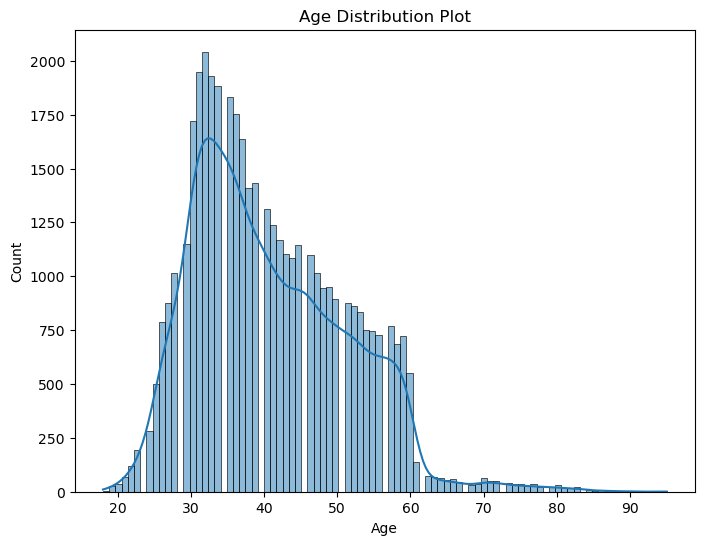

In [262]:
# Create a distribution plot for the 'age' column
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.histplot(data=data, x='age', kde=True)  # Create the distribution plot
plt.title('Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### Relationship between the age and subcription

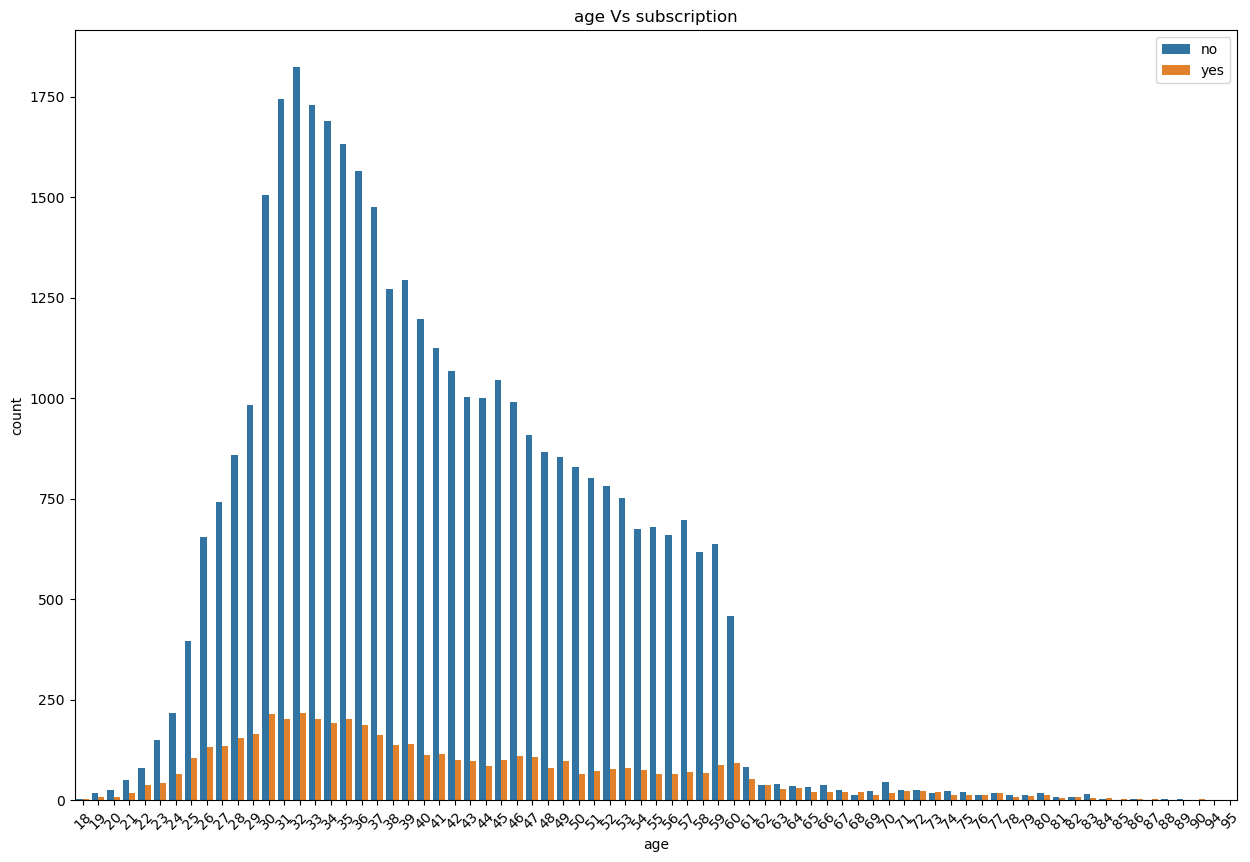

In [263]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='age', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel("age")
plt.title("age Vs subscription")
plt.legend(['no', 'yes'])
plt.show()

##  checking for outliers 

Now let as put a boxplot for the numerical columns so that we can find and remove the outliers , which potentially affects our model accuracy and precision

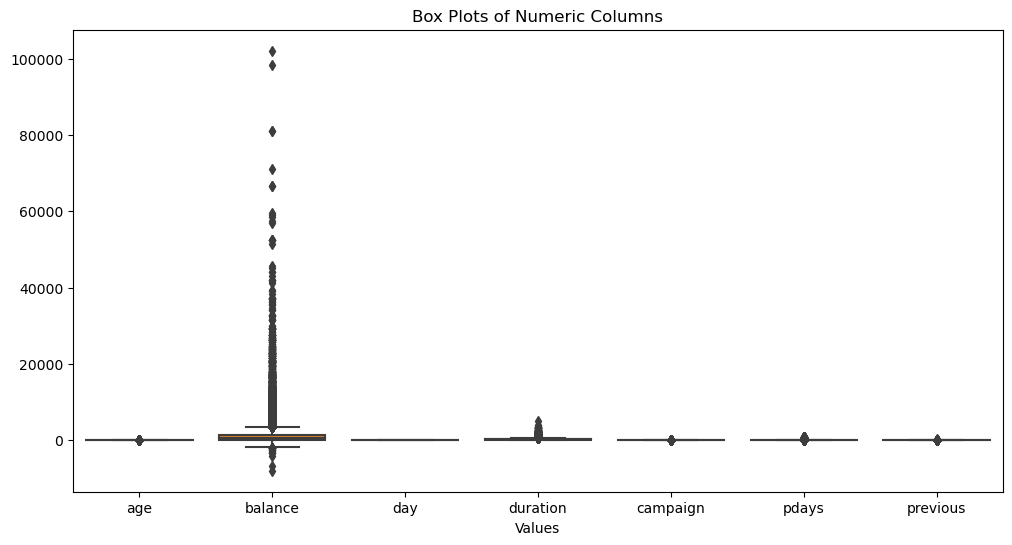

In [264]:
# Selecting numeric columns from the DataFrame
num_cols = data.select_dtypes(include='number')

# Creating box plots for all numeric columns
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
sns.boxplot(data=num_cols, orient='v')  # 'orient' can be 'v' for vertical or 'h' for horizontal
plt.title('Box Plots of Numeric Columns')
plt.xlabel('Values')
plt.show()

#### As we can see there are more number of outliers in the balance and duration columns , so we are gonna remove those outliers

In [265]:
# Method for identifying outliers for the 'balance' column
Q1_balance = data['balance'].quantile(0.25)
Q3_balance = data['balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance
threshold_balance = 1.80 * IQR_balance

# Removing outliers from 'balance'
df_no_outliers_balance = data[(data['balance'] >= Q1_balance - threshold_balance) & (data['balance'] <= Q3_balance + threshold_balance)]
data = df_no_outliers_balance
# Method for identifying outliers for the 'duration' column
Q1_duration = data['duration'].quantile(0.25)
Q3_duration = data['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
threshold_duration =1.80 * IQR_duration

# Removing outliers from 'duration'
df_no_outliers_duration = data[(data['duration'] >= Q1_duration - threshold_duration) & (data['duration'] <= Q3_duration + threshold_duration)]
data = df_no_outliers_duration
# Method for identifying outliers for the 'age' column
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
threshold_age = 1.80 * IQR_age

# Removing outliers from 'age'
df_no_outliers_age = data[(data['age'] >= Q1_age - threshold_age) & (data['age'] <= Q3_age + threshold_age)]
data = df_no_outliers_age

data.shape

(36878, 15)

### Now we are visualize and find the relationship of various columns with the subcription

#### JOB vs SUBCRIPTION

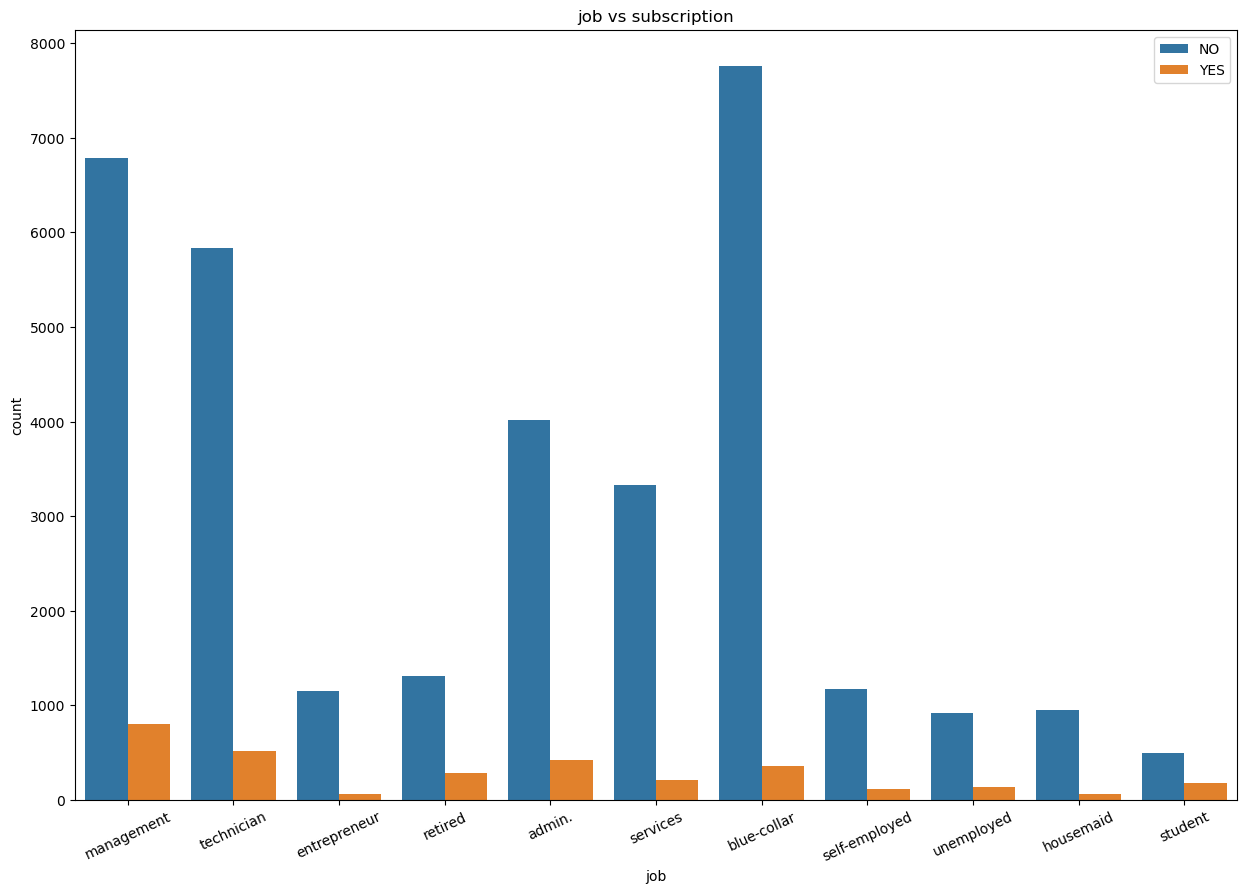

In [266]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='job', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.xlabel("job")
plt.title("job vs subscription")
plt.legend(['NO', 'YES'])
plt.show()

### Martial status vs subscription

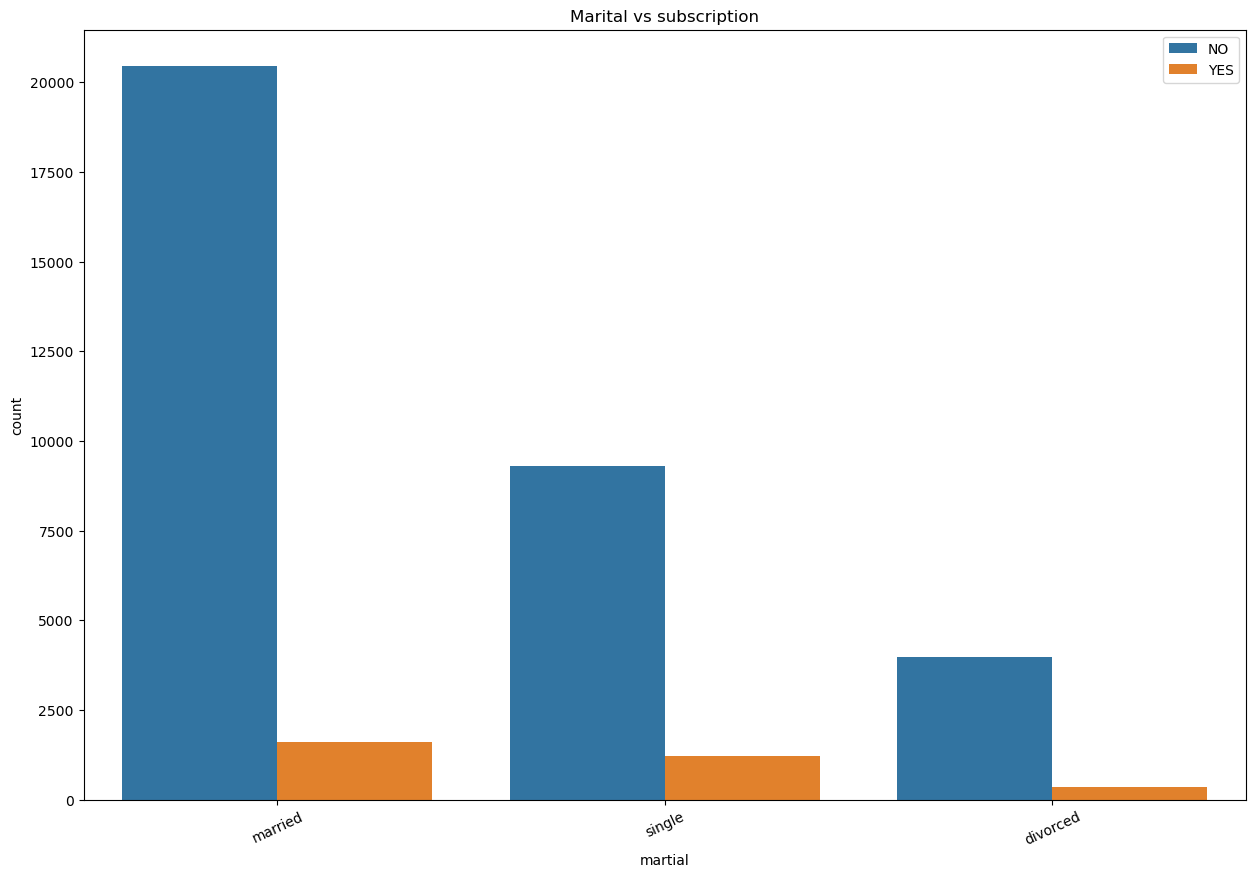

In [267]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='marital', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.xlabel("martial")
plt.title("Marital vs subscription")
plt.legend(['NO', 'YES'])
plt.show()

#### By this plot we found that the divorced or widowed customers are less likely to take our subcription compared to married and single customers

### Education vs subcription

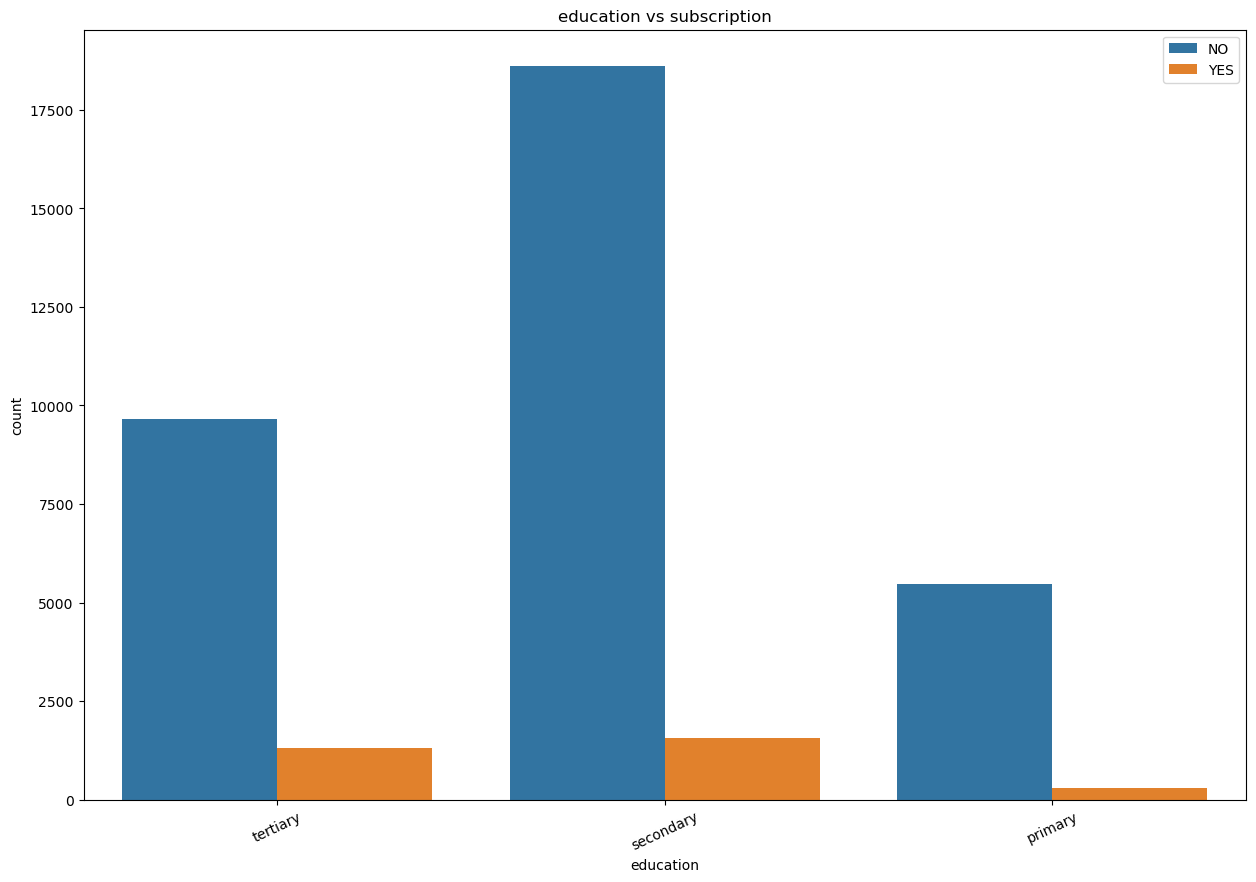

In [268]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='education', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.xlabel("education")
plt.title("education vs subscription")
plt.legend(['NO', 'YES'])
plt.show()

### Default vs subcription

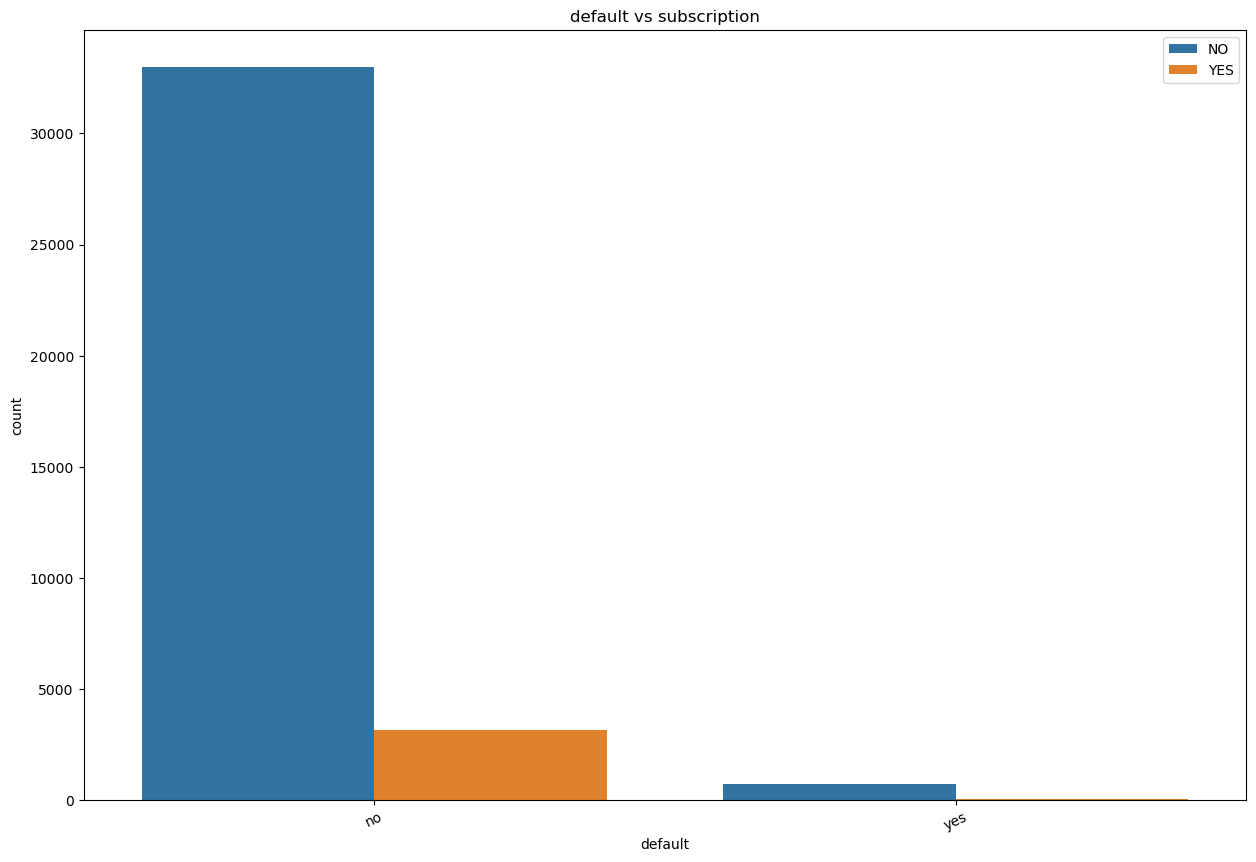

In [269]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='default', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.xlabel("default")
plt.title("default vs subscription")
plt.legend(['NO', 'YES'])
plt.show()

### Housing loan vs subscription

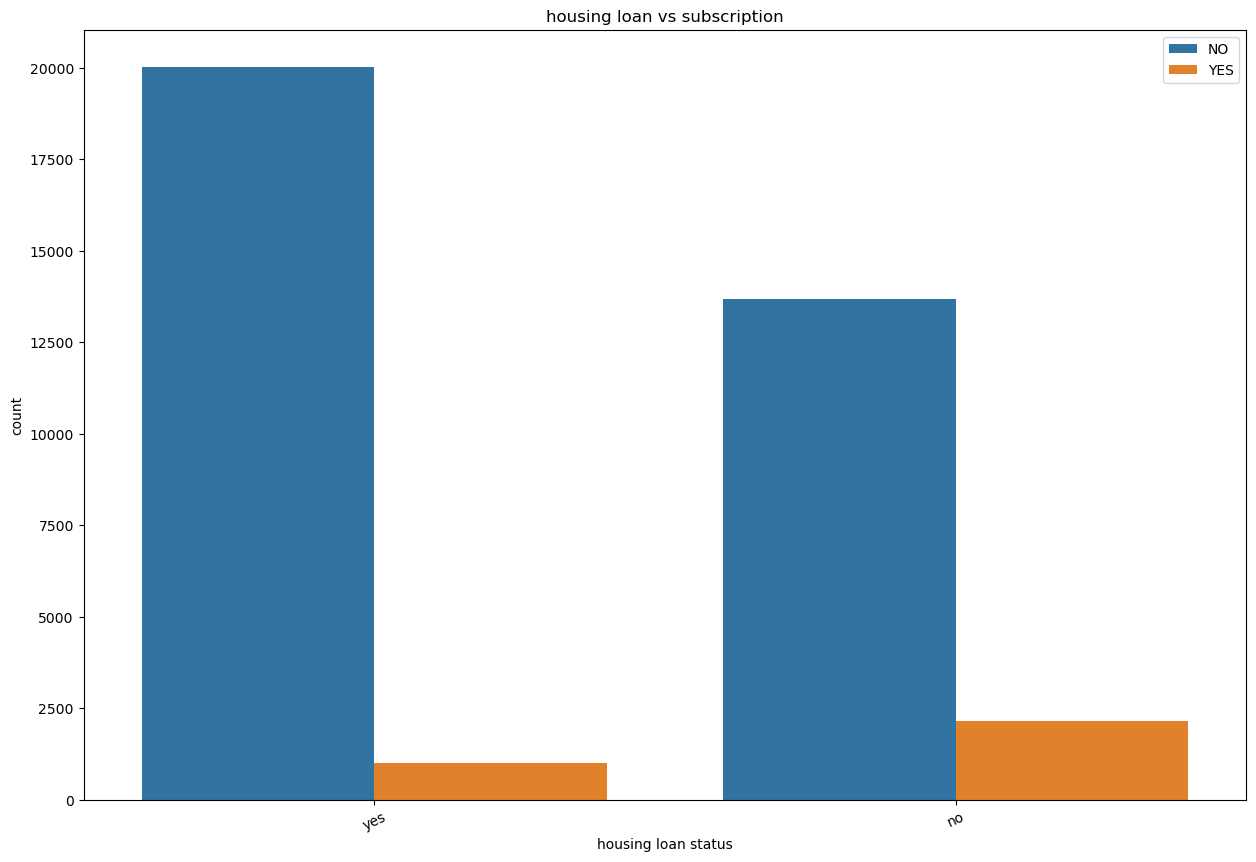

In [270]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='housing', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.xlabel("housing loan status")
plt.title("housing loan vs subscription")
plt.legend(['NO', 'YES'])
plt.show()

### Personal loan status vs subscription

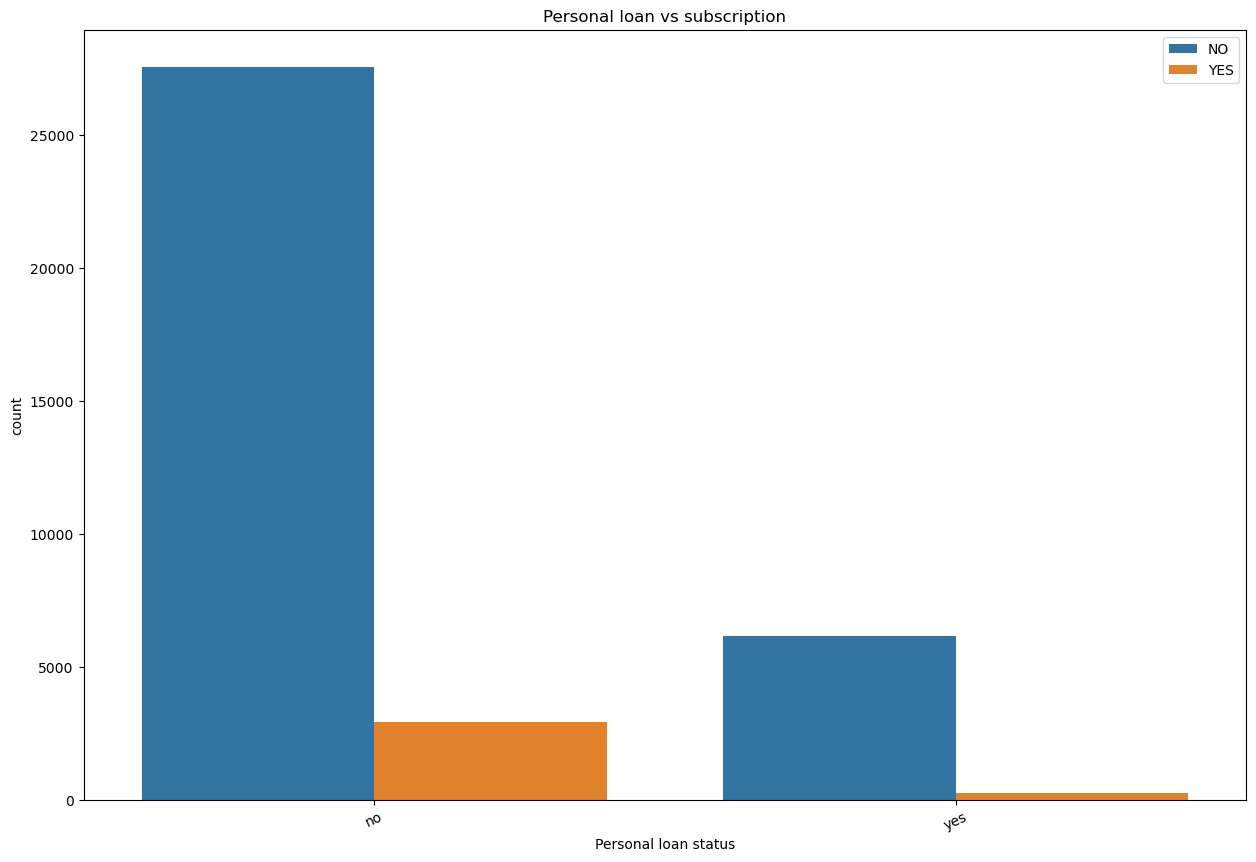

In [271]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='loan', hue=data.y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.xlabel("Personal loan status")
plt.title("Personal loan vs subscription")
plt.legend(['NO', 'YES'])
plt.show()

After the visualization we found out that the majority of the customers who subcribed our terms are not married and single persons with good education and with no defauld and with no personal loans

## Converting the catagorical column:

In [272]:

data['job'] = data['job'].map({
    'blue-collar': 0,
    'management': 1,
    'technician': 2,
    'admin': 3,
    'services': 4,
    'retired': 5,
    'self-employed': 6,
    'entrepreneur': 7,
    'unemployed': 8,
    'housemaid': 9,
    'student': 10,
})


data['marital'] = data['marital'].map({'single': 0 ,'married': 1 ,'divorced': 2})

data['education'] = data['education'].map({'primary': 0 ,'secondary': 1 ,'tertiary': 2})

data['default'] = data['default'].map({'no': 0 ,'yes': 1 })

data['housing'] = data['housing'].map({'no': 0 ,'yes': 1 })

data['loan'] = data['loan'].map({'no': 0 ,'yes': 1 })

data['month'] = data['month'].map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec':12
})

data['y'] = data['y'].map({'no': 0 ,'yes': 1 })


# Impute missing values with median (you can use other strategies as well)
data = data.fillna(data.median())



 we are performing feature engineering and data preprocessing on the 'data' DataFrame. The goal is to transform categorical columns into numerical format by mapping their values to numerical equivalents. This process is essential for preparing the data for machine learning algorithms, as many algorithms require numerical inputs rather than categorical ones.

Here's a breakdown of what we're doing in this code:

We are mapping specific values of categorical columns to numerical values to encode them appropriately.
Columns like 'job,' 'marital,' 'education,' 'default,' 'housing,' 'loan,' 'month,' and 'y' are being transformed to numerical representations.
The resulting DataFrame will have these columns with numerical values, making it suitable for machine learning tasks such as classification.
This preprocessing step is essential for building and training machine learning models, as they typically work with numerical data.

In [273]:
data.dtypes

age            int64
job          float64
marital        int64
education      int64
default        int64
balance        int64
housing        int64
loan           int64
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
y              int64
dtype: object

In [274]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,1.0,1,2,0,2143,1,0,5,5,261,1,-1,0,0
1,44,2.0,0,1,0,29,1,0,5,5,151,1,-1,0,0
2,33,7.0,1,1,0,2,1,1,5,5,76,1,-1,0,0
5,35,1.0,1,2,0,231,1,0,5,5,139,1,-1,0,0
6,28,1.0,0,2,0,447,1,1,5,5,217,1,-1,0,0
7,42,7.0,2,2,1,2,1,0,5,5,380,1,-1,0,0
8,58,5.0,1,0,0,121,1,0,5,5,50,1,-1,0,0
9,43,2.0,0,1,0,593,1,0,5,5,55,1,-1,0,0
10,41,2.0,2,1,0,270,1,0,5,5,222,1,-1,0,0
11,29,2.0,0,1,0,390,1,0,5,5,137,1,-1,0,0


As we can see we have converted the catagorical values into numerical values now the dataset is ready to train the model.

# Correlation matrix

In [275]:
corr_matrix = data.corr()
corr_matrix

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
age,1.000000,0.061508,0.408266,-0.161073,-0.011706,0.092019,-0.162271,0.007377,-0.004897,0.091141,-0.025338,0.010868,-0.027738,-0.004064,0.008255
job,0.061508,1.000000,-0.017706,-0.008611,0.001301,0.016236,-0.154552,-0.026519,-0.005708,0.023537,0.008144,-0.024495,-0.024899,-0.006741,0.062881
marital,0.408266,-0.017706,1.000000,-0.121343,0.010164,-0.014929,0.018489,0.048132,0.006278,0.048630,-0.015607,0.009356,-0.022776,-0.015692,-0.054009
education,-0.161073,-0.008611,-0.121343,1.000000,-0.012383,0.045648,-0.087896,-0.027030,0.028303,0.073086,0.003515,0.003392,0.002113,0.023162,0.085418
default,-0.011706,0.001301,0.010164,-0.012383,1.000000,-0.127441,-0.011779,0.073497,0.010224,0.021946,-0.003712,0.017927,-0.032143,-0.017498,-0.022983
balance,0.092019,0.016236,-0.014929,0.045648,-0.127441,1.000000,-0.062826,-0.096573,-0.000336,0.060974,0.033562,-0.031719,0.026268,0.032542,0.094186
housing,-0.162271,-0.154552,0.018489,-0.087896,-0.011779,-0.062826,1.000000,0.029160,-0.037623,-0.184396,0.003594,-0.027435,0.129838,0.041974,-0.155140
loan,0.007377,-0.026519,0.048132,-0.027030,0.073497,-0.096573,0.029160,1.000000,0.010547,0.030023,-0.014070,0.010986,-0.023980,-0.008877,-0.077682
day,-0.004897,-0.005708,0.006278,0.028303,0.010224,-0.000336,-0.037623,0.010547,1.000000,0.102341,-0.045783,0.170608,-0.097379,-0.052485,-0.037004
month,0.091141,0.023537,0.048630,0.073086,0.021946,0.060974,-0.184396,0.030023,0.102341,1.000000,-0.032035,0.065461,-0.119567,-0.043369,0.019944


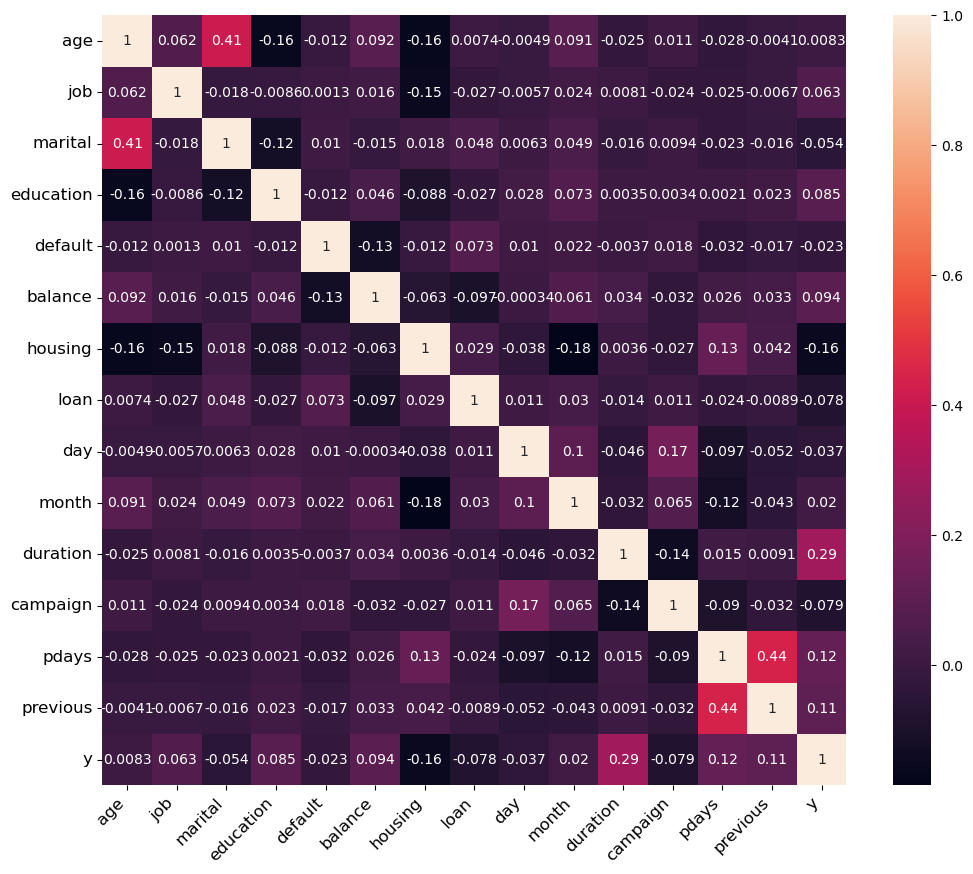

In [276]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.show()

### Dividing the data into train and test data:

 NOW LET US USE THE KFOLD OR 10FOLD STRATEGY TO TRAIN THE MODEL AND CROSS VALIDATION TO EVALUATE ITS ACCURACY , AND I AM ALSO GOING TO DO FEATURE SCALING FOR THEIR IMPROVISED PERFORMANCE


In [277]:
Y = data['y'].values
X = data.drop('y', axis=1).values

# NOW I AM SEPARATING THE TRAIN AND TEST DATA IN ORDER TO TRAIN THE MODEL
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25, random_state=7)

models_list = []
models_list.append(('log reg', LogisticRegression()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('LDA',LinearDiscriminantAnalysis()))
models_list.append(('RFC',RandomForestClassifier()))

# NOW LET US USE THE KFOLD OR 10FOLD STRATEGY TO TRAIN THE MODEL AND CROSS VALIDATION TO EVALUATE ITS ACCURACY

num_folds = 10

results = []
names = []

pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaledlog reg', Pipeline([('Scaler', StandardScaler()),('log reg', LogisticRegression( ))])))
pipelines.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))

print("\n\n\nAccuracies of algorithm after scaling:\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))





Accuracies of algorithm after scaling:

ScaledCART: 0.894208 (0.005851) (run time: 2.292104)
ScaledLDA: 0.909936 (0.005320) (run time: 1.241664)
ScaledNB: 0.874395 (0.005880) (run time: 0.278281)
ScaledKNN: 0.913624 (0.004346) (run time: 22.021070)
Scaledlog reg: 0.913732 (0.004613) (run time: 0.478720)
ScaledRFC: 0.925085 (0.005068) (run time: 43.723762)


### Now let us ask the model to predict the values with unknown dataset to the model.


In [231]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
model = LogisticRegression( )
start = time.time()
model.fit(X_train_scaled, Y_train)   #Training of algorithm
end = time.time()
print( "\n\n LogisticRegression Training Completed. It's Run Time: %f" % (end-start))



# estimate accuracy on test dataset
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
print("All predictions done successfully by LogisticRegression Machine Learning Algorithm")
print("\n\nAccuracy score %f" % accuracy_score(Y_test, predictions))

print("\n\n")
print("confusion_matrix = \n")
print( confusion_matrix(Y_test, predictions))


report = classification_report(Y_test, predictions)
print("\n\n\nclassification_report:\n\n",report)




 LogisticRegression Training Completed. It's Run Time: 0.064825
All predictions done successfully by LogisticRegression Machine Learning Algorithm


Accuracy score 0.919848



confusion_matrix = 

[[8356  101]
 [ 638  125]]



classification_report:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      8457
           1       0.55      0.16      0.25       763

    accuracy                           0.92      9220
   macro avg       0.74      0.58      0.61      9220
weighted avg       0.90      0.92      0.90      9220



### saving the trained model

In [234]:
import joblib
filename = "LOGISTIC REGRESSION MODEL.sav"
joblib.dump(model, filename)
print( "Model dumped successfully into a file by Joblib")

Model dumped successfully into a file by Joblib


In [236]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
model = RandomForestClassifier()
start = time.time()
model.fit(X_train_scaled, Y_train)   #Training of algorithm
end = time.time()
print( "\n\n RandomForestClassifier Training Completed. It's Run Time: %f" % (end-start))



# estimate accuracy on test dataset
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
print("All predictions done successfully by RandomForestClassifier Machine Learning Algorithm")
print("\n\nAccuracy score %f" % accuracy_score(Y_test, predictions))

print("\n\n")
print("confusion_matrix = \n")
print( confusion_matrix(Y_test, predictions))


report = classification_report(Y_test, predictions)
print("\n\n\nclassification_report:\n\n",report)




 RandomForestClassifier Training Completed. It's Run Time: 5.476047
All predictions done successfully by RandomForestClassifier Machine Learning Algorithm


Accuracy score 0.931020



confusion_matrix = 

[[8344  113]
 [ 523  240]]



classification_report:

               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8457
           1       0.68      0.31      0.43       763

    accuracy                           0.93      9220
   macro avg       0.81      0.65      0.70      9220
weighted avg       0.92      0.93      0.92      9220



##  The 10 questions that need to be answered :


###  1. What is the distribution of the customer ages?

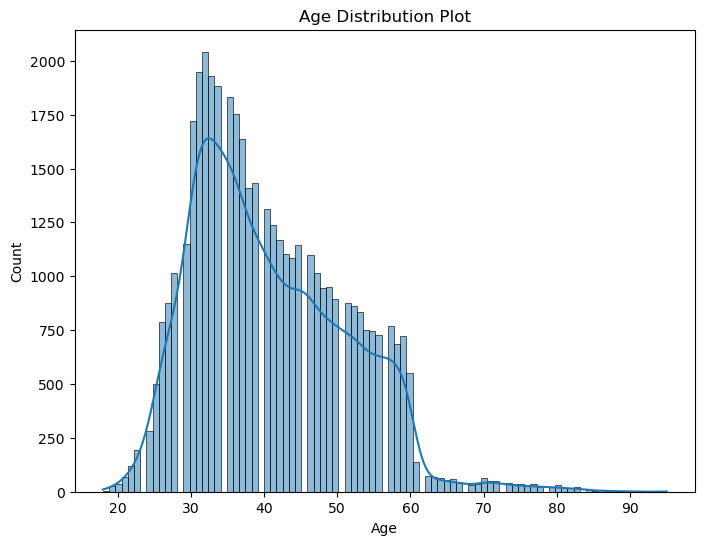

In [237]:
customer_age = data['age']


mean_age = customer_age.mean()
median_age = customer_age.median()

percentile_25 = customer_age.quantile(0.25)
percentile_75 = customer_age.quantile(0.75)

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)


Mean Age: 40.33827756385921
Median Age: 38.0
25th Percentile: 32.0
75th Percentile: 48.0


### 2. What is the relationship between customer age and subscription?


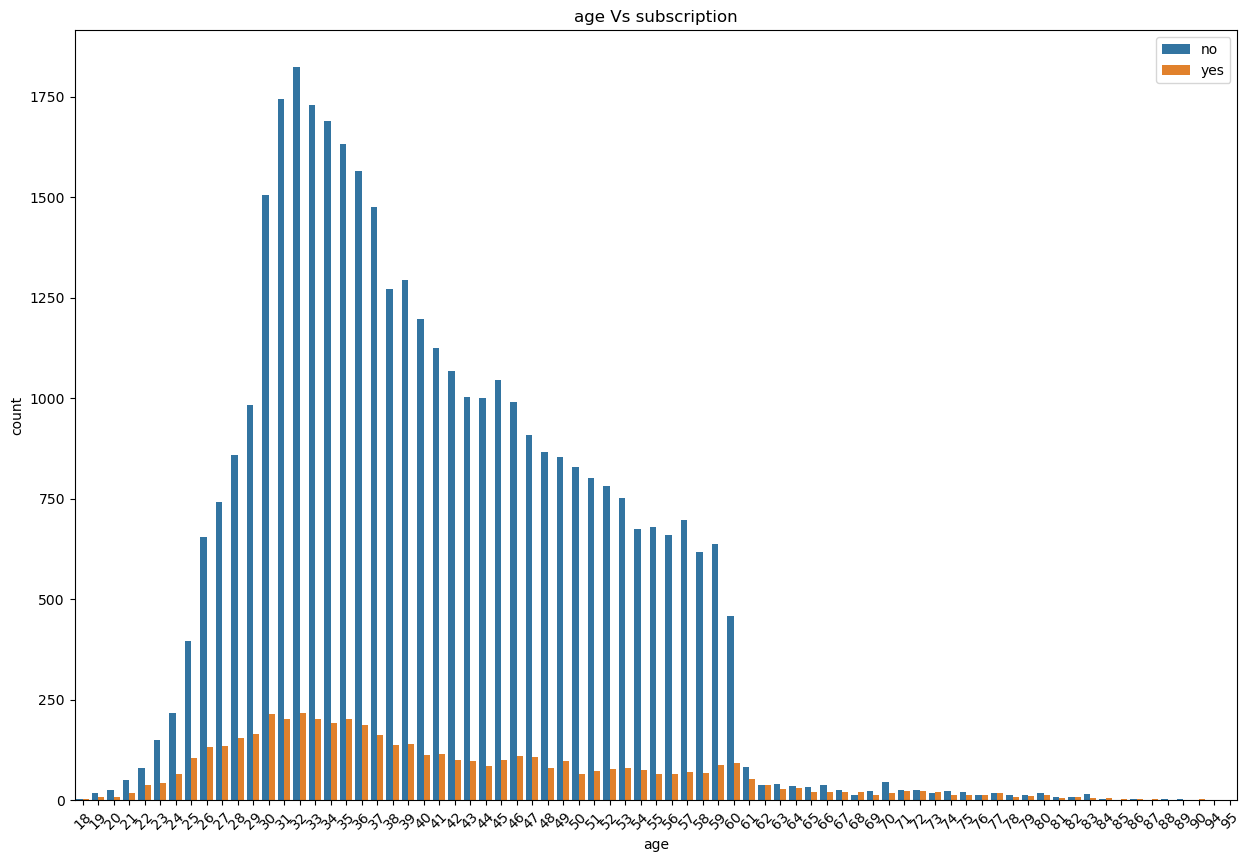

### I observed that when the customers age increases their probability of subscription is reducing
### therefore I can say that they are quite inversly proportional .

### 3) Are there any other factors that are correlated with subscription?

Most of the features are releted to the subcription status . This is found by the correlation matrix

### 4. What is the accuracy of the logistic regression model?

Accuracy score of logistic regression model is 0.919848
The accuracy can further be increased but to balance the precision , f1 , recall values I found this will be optimum. 


### 5. What are the most important features for the logistic regression model?

In [243]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, Y_train)

# Get the coefficients assigned to each feature
coefficients = model.coef_[0]

# Create a list of feature names (assuming they are in the same order as in X)
feature_names = ['age','job','marital','education','default','housing','loan','balance','contact','day','month','duration',  'campaign' , 'pdays' , 'previous', 'poutcome']

# Create a dictionary to store feature names and their corresponding coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort features by absolute coefficient value (importance)
important_features = sorted(feature_coefficients.items(), key=lambda x_train: abs(x_train[1]), reverse=True)

# Display the most important features and their coefficients
for feature, coefficient in important_features:
    print(f"Feature: {feature}, Coefficient: {coefficient:.4f}")



Feature: loan, Coefficient: -0.8206
Feature: duration, Coefficient: -0.5765
Feature: balance, Coefficient: -0.2307
Feature: marital, Coefficient: -0.1270
Feature: pdays, Coefficient: 0.0751
Feature: education, Coefficient: -0.0335
Feature: age, Coefficient: -0.0291
Feature: contact, Coefficient: -0.0219
Feature: default, Coefficient: -0.0176
Feature: job, Coefficient: -0.0073
Feature: day, Coefficient: 0.0073
Feature: month, Coefficient: 0.0042
Feature: campaign, Coefficient: 0.0017
Feature: housing, Coefficient: 0.0001


#### Based on the coefficient vaules 
#### here are the top 5 features for logistic regression model


1) Loan (Coefficient: -0.8206): This is the most important feature. The negative coefficient indicates that having a loan has a significant negative impact on the likelihood of subscribing to a term deposit. Customers with loans are much less likely to subscribe.

2) Duration (Coefficient: -0.5765): The second most important feature. A longer call duration is associated with a significantly lower likelihood of subscribing. Shorter call durations are more favorable for subscription.

3) Balance (Coefficient: -0.2307): The balance in the customer's account is also highly influential. A higher account balance has a significant negative impact on subscription, meaning customers with higher balances are less likely to subscribe.

4) Marital (Coefficient: -0.1270): The marital status of the customer is the fourth most important feature. Being married (or having a marital status other than single) is associated with a lower likelihood of subscribing.

5) Pdays (Coefficient: 0.0751): The fifth most important feature. A longer time since the last contact (higher value for pdays) has a small positive impact on subscription. Customers who were contacted more recently are slightly more likely to subscribe.

### 6. What is the precision of the logistic regression model?

 logistic regression model:

               precision   

           0       0.93      
           1       0.55      

### 7. What is the recall of the logistic regression model?

logistic regression model:

                 recall 

           0       0.99   
           1       0.16   

### 8. What is the f1-score of the logistic regression model?


logistic regression model:

                 f1-score 

           0       0.96
           1       0.25 

### 9. How can you improve the performance of the logistic regression model?

1) Feature Scaling:
   feature scaling plays an important role in the accuracy of the  logistic regression model.
  
2) Outlier Detection and Handling:
    finding and removal of the outliers may potentially affect the model
        
3) Cross-Validation:
   Using k-fold cross-validation to assess the model's performance more reliably and avoid overfitting  




### 10. What are the limitations of the logistic regression model?

1) Linearity Assumption: Logistic regression assumes a linear relationship between the features and the log-odds of the response variable. This means it may not perform well when dealing with complex, non-linear relationships in the data.

2) Sensitivity to Outliers: Outliers in the data can significantly affect the coefficients and predictions of a logistic regression model. Proper outlier detection and handling are crucial for robust results.

3) Limited Expressiveness: Logistic regression has limited expressiveness, which means it may struggle to capture complex interactions and patterns in the data. In cases where the underlying relationships are highly intricate, more sophisticated models might be required for better performance.